<a href="https://colab.research.google.com/github/muhammad-usama-aleem/Roboflow-classification-notebooks/blob/main/train-vision-transformer-classification-on-custom-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training the Vision Transformer on a Custom Dataset

In this notebook, we are going to fine-tune a pre-trained Vision Transformer (which can be found from [Huggingface](https://github.com/huggingface/transformers)) on a Custom Dataset. For this notebook we will be using the Rock, Paper, Scissors dataset which can be found [here](https://public.roboflow.com/classification/rock-paper-scissors/1). This dataset is a collection of 2925 images images in 3 different classes. This tutorial is based on Huggingface's [Fine tuning the Vision Transformer on CIFAR 10 notebook](https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/VisionTransformer/Fine_tuning_the_Vision_Transformer_on_CIFAR_10_with_the_%F0%9F%A4%97_Trainer.ipynb).

### Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on [How to Train the HuggingFace Vision Transformer On a Custom Dataset](blog.roboflow.com/how-to-train-the-huggingface-vision-transformer-on-a-custom-dataset/) concurrently.


We will prepare the data using [Roboflow's Preprocessing Tools](https://docs.roboflow.com/image-transformations/image-preprocessing), and train the model using this notebook.

### Steps Covered in this Tutorial

In this tutorial, we will walk through the steps required to train a Vision Transformer on your custom classification data.

To train our image classifier we take the following steps:

* Install Vision Transformer dependencies
* Download custom Image Classification data using Roboflow
* Use the Vision Transformer Feature Extractor
* Run the Vision Transformer training procedure
* Evaluate the Vision Transformer on a test image
* Export the Vision Transformer model for future inference


### **About**

[Roboflow](https://roboflow.com) enables teams to deploy custom computer vision models quickly and accurately. Convert data from to annotation format, assess dataset health, preprocess, augment, and more. It's free for your first 1000 source images.

**Looking for a vision model available via API without hassle? Try Roboflow Train.**

![Roboflow Wordmark](https://i.imgur.com/dcLNMhV.png)



Let's start by installing the relevant libraries.

In [1]:
!pip install -q git+https://github.com/huggingface/transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Download the Data

We'll preprocess and download our dataset from Roboflow. To preprocess the images, change the size of the image to 224x224. To download the dataset, use the "**Folder Structure**" export format.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

Note: This data has already been preprocessed through Roboflow; we HIGHLY reccommend you follow the [accompanying blog](blog.roboflow.com/how-to-train-the-huggingface-vision-transformer-on-a-custom-dataset/) as you go through this notebook.

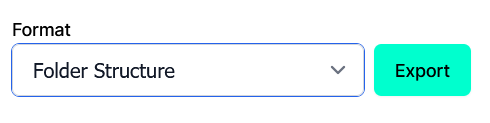

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xc8fRDZlnwq0GPxull7m")
project = rf.workspace("agtech-aig").project("rices-yvmle")
dataset = project.version(2).download("multiclass")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rices-2 in multiclass:: 100%|██████████| 16690/16690 [00:05<00:00, 2946.12it/s]


In [3]:
import os
import shutil

def organize_images(input_folder):
    # Create the rice directory if it doesn't exist
    rice_directory = "rice"
    if not os.path.exists(rice_directory):
        os.makedirs(rice_directory)

    # Get the subfolders (train, test, valid) in the input folder
    subfolders = [f for f in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, f))]

    for subfolder in subfolders:
        # Create train, test, valid directories in the rice folder
        rice_subfolder = os.path.join(rice_directory, subfolder)
        if not os.path.exists(rice_subfolder):
            os.makedirs(rice_subfolder)

        # Get the list of images in the current subfolder
        images = [f for f in os.listdir(os.path.join(input_folder, subfolder)) if f.endswith(".jpg")]

        for image in images:
            # Extract the name from the image filename
            name = image.split("-")[0]

            # Create a directory with the name if it doesn't exist
            name_directory = os.path.join(rice_subfolder, name)
            if not os.path.exists(name_directory):
                os.makedirs(name_directory)

            # Move the image to the respective name directory
            source_path = os.path.join(input_folder, subfolder, image)
            destination_path = os.path.join(name_directory, image)
            shutil.move(source_path, destination_path)

organize_images('/content/rices-2')


In [4]:
import os

def count_images(input_folder):
    # Get the subfolders (train, test, valid) in the input folder
    subfolders = [f for f in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, f))]

    for subfolder in subfolders:
        print(f"\nCategory Counts in {subfolder} folder:")
        category_counts = {}

        # Get the list of images in the current subfolder
        images = [f for f in os.listdir(os.path.join(input_folder, subfolder)) if f.endswith(".jpg")]

        for image in images:
            # Extract the name from the image filename
            name = image.split("-")[0]

            # Update the count for the current category
            category_counts[name] = category_counts.get(name, 0) + 1

        # Print the counts for each category
        for name, count in category_counts.items():
            print(f"{name}: {count} images")

count_images('/content/rice/train')
count_images('/content/rice/valid')
count_images('/content/rice/test')


Category Counts in Ipsala folder:
Ipsala: 2706 images

Category Counts in basmati folder:
basmati: 2672 images

Category Counts in Jasmine folder:
Jasmine: 2842 images

Category Counts in Arborio folder:
Arborio: 2835 images

Category Counts in Karacadag folder:
Karacadag: 2687 images

Category Counts in Ipsala folder:
Ipsala: 369 images

Category Counts in basmati folder:
basmati: 394 images

Category Counts in Jasmine folder:
Jasmine: 416 images

Category Counts in Arborio folder:
Arborio: 394 images

Category Counts in Karacadag folder:
Karacadag: 385 images

Category Counts in Ipsala folder:
Ipsala: 177 images

Category Counts in basmati folder:
basmati: 220 images

Category Counts in Jasmine folder:
Jasmine: 196 images

Category Counts in Arborio folder:
Arborio: 185 images

Category Counts in Karacadag folder:
Karacadag: 204 images


Next, convert the folder structure dataset into a PyTorch dataset format using PyTorch's ImageFolder dataset structure:

In [5]:
import torchvision
from torchvision.transforms import ToTensor

train_ds = torchvision.datasets.ImageFolder('/content/rice/train/', transform=ToTensor())
valid_ds = torchvision.datasets.ImageFolder('/content/rice/valid/', transform=ToTensor())
test_ds = torchvision.datasets.ImageFolder('/content/rice/test/', transform=ToTensor())

## Define the Model

Here we define the model.

The model itself uses a linear layer on top of a pre-trained `ViTModel`. We place a linear layer on top of the last hidden state of the [CLS] token, which serves as a good representation of an entire image. We also add dropout for regularization.

**Note:** The Vision Transformer pretrained model can be used as a regular PyTorch layer.

In [6]:
from transformers import ViTModel
from transformers.modeling_outputs import SequenceClassifierOutput
import torch.nn as nn
import torch.nn.functional as F

class ViTForImageClassification(nn.Module):
    def __init__(self, num_labels=5):
        super(ViTForImageClassification, self).__init__()
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.vit.config.hidden_size, num_labels)
        self.num_labels = num_labels

    def forward(self, pixel_values, labels):
        outputs = self.vit(pixel_values=pixel_values)
        output = self.dropout(outputs.last_hidden_state[:,0])
        logits = self.classifier(output)

        loss = None
        if labels is not None:
          loss_fct = nn.CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        if loss is not None:
          return logits, loss.item()
        else:
          return logits, None

## Define the Model Parameters

To train this model, we will train in 3 epochs, with a batch size of 10 and a learning rate of 2e-5:

In [11]:
EPOCHS = 3
BATCH_SIZE = 10
LEARNING_RATE = 2e-5

We will use the pretrained Vision Transformer feature extractor, an Adam Optimizer, and a Cross Entropy Loss function.

In [12]:
from transformers import ViTFeatureExtractor
import torch.nn as nn
import torch
# Define Model
model = ViTForImageClassification(len(train_ds.classes))
# Feature Extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
# Cross Entropy Loss
loss_func = nn.CrossEntropyLoss()
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    model.cuda()

## Train the Model

In [14]:
import torch.utils.data as data
from torch.autograd import Variable
import numpy as np

print("Number of train samples: ", len(train_ds))
print("Number of test samples: ", len(test_ds))
print("Detected Classes are: ", train_ds.class_to_idx)

train_loader = data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2)
test_loader  = data.DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# Train the model
for epoch in range(EPOCHS):
  for step, (x, y) in enumerate(train_loader):
    # Check if the batch size is greater than the number of samples
    if len(x) < BATCH_SIZE:
        continue

    # Change input array into list with each batch being one element
    x = np.split(np.squeeze(np.array(x)), BATCH_SIZE)
    # Remove unnecessary dimension
    for index, array in enumerate(x):
      x[index] = np.squeeze(array)
    # Apply feature extractor, stack back into 1 tensor and then convert to tensor
    x = torch.tensor(np.stack(feature_extractor(x)['pixel_values'], axis=0))
    # Send to GPU if available
    x, y  = x.to(device), y.to(device)
    b_x = Variable(x)   # batch x (image)
    b_y = Variable(y)   # batch y (target)
    # Feed through model
    output, loss = model(b_x, None)
    # Calculate loss
    if loss is None:
      loss = loss_func(output, b_y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    if step % 50 == 0:
      # Get the next batch for testing purposes
      test = next(iter(test_loader))
      test_x = test[0]
      # Check if the batch size is greater than the number of samples
      if len(test_x) < BATCH_SIZE:
          continue
      # Reshape and get feature matrices as needed
      test_x = np.split(np.squeeze(np.array(test_x)), BATCH_SIZE)
      for index, array in enumerate(test_x):
        test_x[index] = np.squeeze(array)
      test_x = torch.tensor(np.stack(feature_extractor(test_x)['pixel_values'], axis=0))
      # Send to appropriate computing device
      test_x = test_x.to(device)
      test_y = test[1].to(device)
      # Get output (+ respective class) and compare to target
      test_output, loss = model(test_x, test_y)
      test_output = test_output.argmax(1)
      # Calculate Accuracy
      accuracy = (test_output == test_y).sum().item() / BATCH_SIZE
      print('Epoch: ', epoch, '| train loss: %.4f' % loss, '| test accuracy: %.2f' % accuracy)


Number of train samples:  13742
Number of test samples:  982
Detected Classes are:  {'Arborio': 0, 'Ipsala': 1, 'Jasmine': 2, 'Karacadag': 3, 'basmati': 4}
Epoch:  0 | train loss: 0.1242 | test accuracy: 1.00
Epoch:  0 | train loss: 0.1038 | test accuracy: 1.00
Epoch:  0 | train loss: 0.3067 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1134 | test accuracy: 1.00
Epoch:  0 | train loss: 1.0271 | test accuracy: 0.60
Epoch:  0 | train loss: 0.1066 | test accuracy: 1.00
Epoch:  0 | train loss: 0.0836 | test accuracy: 1.00
Epoch:  0 | train loss: 0.0861 | test accuracy: 1.00
Epoch:  0 | train loss: 0.0590 | test accuracy: 1.00
Epoch:  0 | train loss: 0.3477 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1187 | test accuracy: 1.00
Epoch:  0 | train loss: 0.1077 | test accuracy: 1.00
Epoch:  0 | train loss: 0.1319 | test accuracy: 0.90
Epoch:  0 | train loss: 0.0454 | test accuracy: 1.00
Epoch:  0 | train loss: 0.2268 | test accuracy: 0.90
Epoch:  0 | train loss: 0.2395 | test accuracy: 0

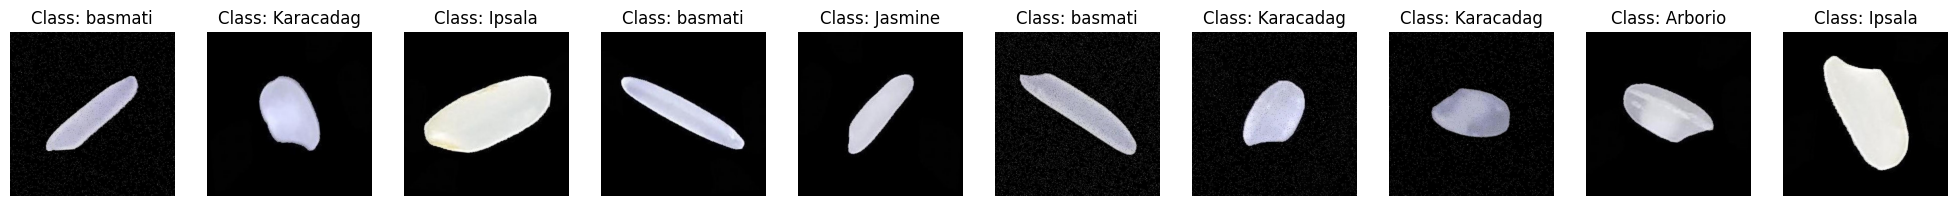

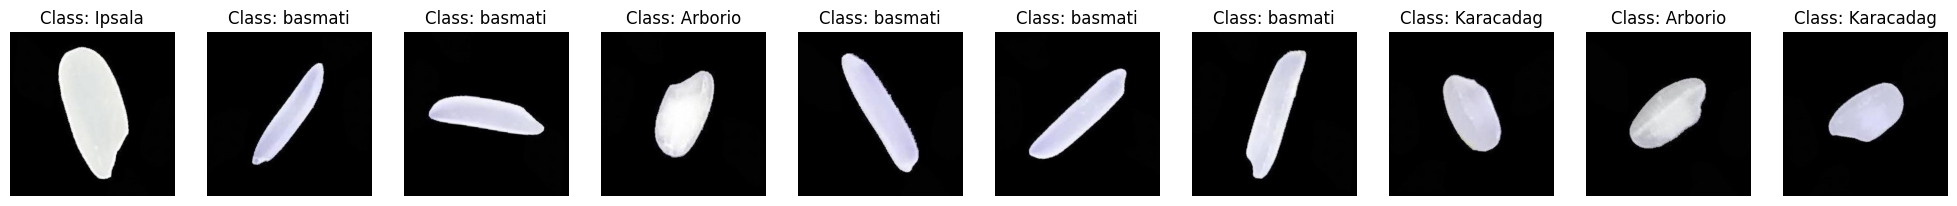

In [25]:
def show_images(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(25, 3))
    for i, (image, label) in enumerate(zip(images, labels)):
        axes[i].imshow(np.transpose(image.numpy(), (1, 2, 0)))
        axes[i].set_title(f'Class: {train_ds.classes[label]}')
        axes[i].axis('off')
    plt.show()

# Get a batch of images and labels
for batch in train_loader:
    images, labels = batch
    show_images(images, labels)
    break  # Display only the first batch of images
print("=================================")

for batch in test_loader:
    images, labels = batch
    show_images(images, labels)
    break  # Display only the first batch of images

## Evaluate on a Test Image

Finally, let's evaluate the model on a test image:

torch.Size([1, 3, 640, 640])


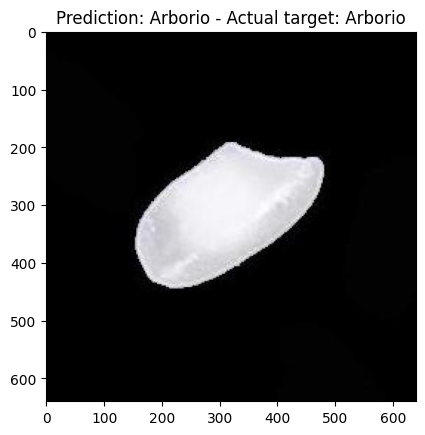

## Save the Entire Model

We can save the entire model as follows:

In [16]:
torch.save(model, '/content/model.pt')

## Export Trained Model

Now that you have trained your custom vision transformer, you can export the trained model you have made here for inference on your device elsewhere

## Use your Exported Model

In [18]:
MODEL_PATH = '/content/model.pt'
model = torch.load(MODEL_PATH)
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7